## Using ggplot for data visualization

### Introduction

- Explore the `ggplot` library in `R` to generate data visualizations for the following plots
    - Scatterplots
    - Bar/column plots
    - Grouped bar plots
    - Maps
- Apply the grammar of graphics to describe data visualizations
- Choose an appropriate visualization when presented with a research question and data
- Extract insight(s) from a visualization


### Getting Started

- Install the `ggplot2` R package (`install.packages`) - if you already have `tidyverse` meta-package installed, you're all set!
- Install the `datasets` R package; we will need this for our plotting today


In [34]:
options(tidyverse.quiet = TRUE) 
# Protip x 2: add the line above to a file you create in your homedir
# called .Rprofile to make this change permanent. You're welcome!

library(tidyverse)
library(datasets)
library(stringr)


### Setting a ggplot theme

- Install the `ggthemes` package using install.packages("ggthemes") in your R console
- Browse the [gallery of ggplot themes](http://www.rpubs.com/mikemooreviz/474964)
- Select a theme that you like 
- Set the default theme to the one you chose above by
 
> library(ggplot2)
>
> theme_set(theme_NAME_OF_THEME_YOU_CHOSE())

- I have chosen `theme_bw()` theme

In [33]:
library(ggplot2)
theme_set(theme_bw())

### Exploring the census dataset

Now you will load a a dataset from file and try to make some plots with it.

### Load the dataset 

In [3]:
census <- read_csv('./data/censusDataIncome.csv', 
                   locale = locale(encoding = 'ISO-8859-1'))
head(census) # Prints out the first few rows and all the columns so they can be inspected

Parsed with column specification:
cols(
  `Geographic code` = col_double(),
  `Geographic name` = col_character(),
  `Geographic type` = col_character(),
  `Geographic name, Province or territory` = col_character(),
  `Geographic code, Province or territory` = col_double(),
  `Global non-response rate` = col_double(),
  `Data quality flag` = col_double(),
  `Household type` = col_character(),
  `Number of households, 2006` = col_double(),
  `Number of households, 2016` = col_double(),
  `Median household total income (2015 constant dollars), 2005` = col_double(),
  `Median household total income (2015 constant dollars), 2015` = col_double(),
  `Median household total income (2015 constant dollars), % change` = col_double(),
  `Median household after-tax income (2015 constant dollars), 2005` = col_double(),
  `Median household after-tax income (2015 constant dollars), 2015` = col_double(),
  `Median household after-tax income (2015 constant dollars), % change` = col_double()
)


Geographic code,Geographic name,Geographic type,"Geographic name, Province or territory","Geographic code, Province or territory",Global non-response rate,Data quality flag,Household type,"Number of households, 2006","Number of households, 2016","Median household total income (2015 constant dollars), 2005","Median household total income (2015 constant dollars), 2015","Median household total income (2015 constant dollars), % change","Median household after-tax income (2015 constant dollars), 2005","Median household after-tax income (2015 constant dollars), 2015","Median household after-tax income (2015 constant dollars), % change"
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,Total â Household type including census family structure,97015,112620,57667,74676,29.5,49750,64504,29.7
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,Census-family households,71960,78825,69720,96124,37.9,59713,81486,36.5
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,Households consisting of only one census family without additional persons,66250,73020,68837,94566,37.4,58715,80012,36.3
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,"One couple, with or without children in their census family",55845,62425,75936,103866,36.8,63975,86949,35.9
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,"One couple, without children in their census family",24275,32085,60122,80364,33.7,51361,69026,34.4
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,"One couple, with children in their census family",31565,30335,89123,130411,46.3,74632,107194,43.6


### Households by province in 2006

**Creating a (horizontal) bar graph of "Number of households, 2006" and "Geographic name, Province or territory"**

> Reference: https://ggplot2-book.org/individual-geoms.html

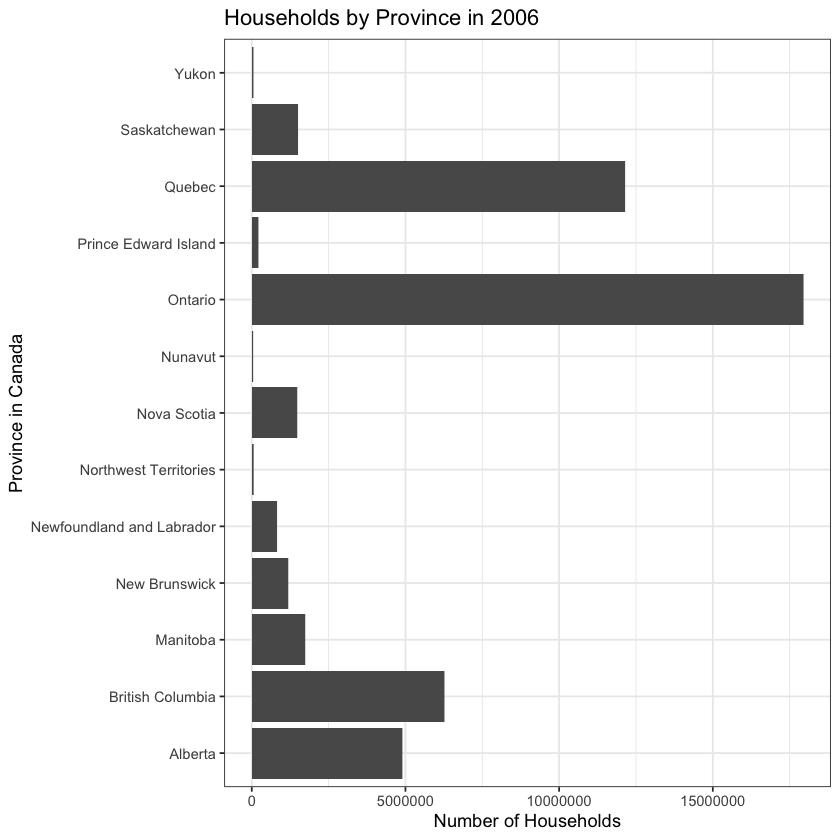

In [36]:
options(scipen = 1000)
ggplot(census, aes(x = `Geographic name, Province or territory`, y = `Number of households, 2006`)) +
      geom_bar(stat = "identity") + 
      ggtitle("Households by Province in 2006") +
       xlab("Province in Canada") +
       ylab("Number of Households") +
      coord_flip()


#### Some observations

- Ontario has the highest number of Households
- The second province with the largest households is Quebec
- Yukon, Nunavut and Northwest Territories have the smallest number of households 
- Alberta has approximately 5 million household

### Comparing household sizes from 2006 to 2016

**Using a grouped horizontal bar graph of the number of households in 2006 _and_ 2016 by province.** 

> Reference: https://ggplot2-book.org/individual-geoms.html


In [11]:
# Pre-wrangled data: use wrangled_census as your data for ggplot

wrangled_census <- census %>% rename(
                    year_2006 = `Number of households, 2006`,
                    year_2016 = `Number of households, 2016`)  %>% 
                    gather("Year", "number_of_households", year_2006:year_2016 )  %>% 
                    mutate( Year = as.factor(gsub(".*_", "", Year)))
head(wrangled_census)



Geographic code,Geographic name,Geographic type,"Geographic name, Province or territory","Geographic code, Province or territory",Global non-response rate,Data quality flag,Household type,"Median household total income (2015 constant dollars), 2005","Median household total income (2015 constant dollars), 2015","Median household total income (2015 constant dollars), % change","Median household after-tax income (2015 constant dollars), 2005","Median household after-tax income (2015 constant dollars), 2015","Median household after-tax income (2015 constant dollars), % change",Year,number_of_households
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,Total â Household type including census family structure,57667,74676,29.5,49750,64504,29.7,2006,97015
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,Census-family households,69720,96124,37.9,59713,81486,36.5,2006,71960
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,Households consisting of only one census family without additional persons,68837,94566,37.4,58715,80012,36.3,2006,66250
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,"One couple, with or without children in their census family",75936,103866,36.8,63975,86949,35.9,2006,55845
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,"One couple, without children in their census family",60122,80364,33.7,51361,69026,34.4,2006,24275
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,"One couple, with children in their census family",89123,130411,46.3,74632,107194,43.6,2006,31565


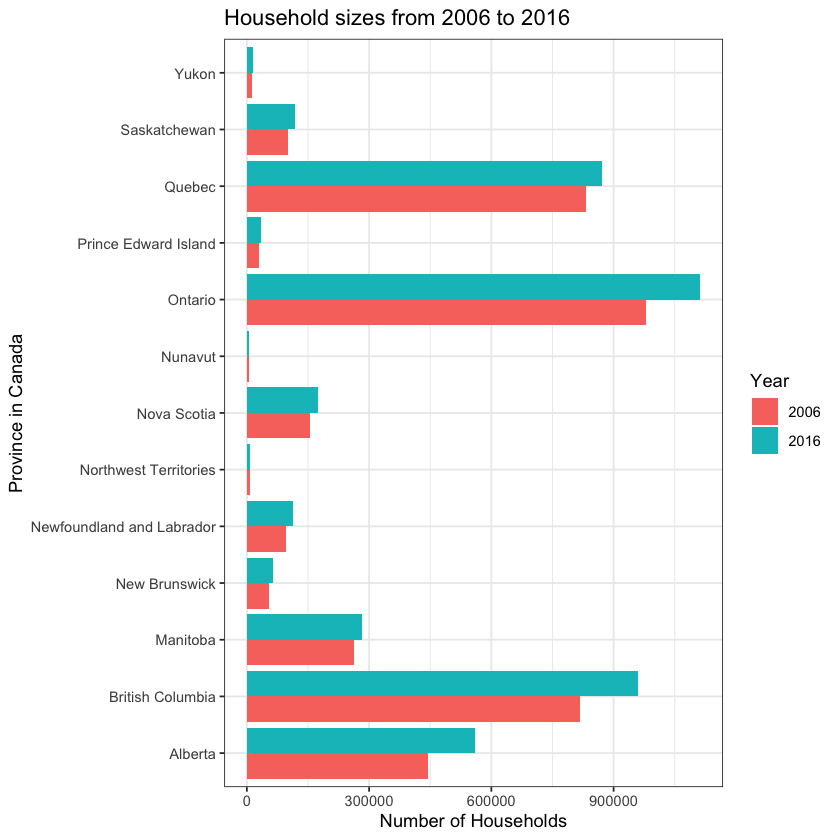

In [39]:
ggplot(wrangled_census, aes(fill = Year, x = `Geographic name, Province or territory`, y = number_of_households)) +
      geom_bar(stat = "identity", position = "dodge") +
      ggtitle("Household sizes from 2006 to 2016") +
      xlab ("Province in Canada") +
      ylab("Number of Households") +
      coord_flip()

#### Observations 
- The number of household population in Ontario and British Columbia has grown the most between 2006 and 2016.
- The population of Nuvanut and Northwest Territories have not grown over the years. 
- The population growth in Yukon is almost negligible when compared to other province.
- Generally across all the province, there has been a population growth between the year 2006 and 2016
- There is a small amount of population growth in Quebec when compared to provinces that had a high population in 2006

**Horizontal jitter plot of the total median household income in 2015 by province.** 

In [32]:
head(census)

Geographic code,Geographic name,Geographic type,"Geographic name, Province or territory","Geographic code, Province or territory",Global non-response rate,Data quality flag,Household type,"Number of households, 2006","Number of households, 2016","Median household total income (2015 constant dollars), 2005","Median household total income (2015 constant dollars), 2015","Median household total income (2015 constant dollars), % change","Median household after-tax income (2015 constant dollars), 2005","Median household after-tax income (2015 constant dollars), 2015","Median household after-tax income (2015 constant dollars), % change"
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,Total â Household type including census family structure,97015,112620,57667,74676,29.5,49750,64504,29.7
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,Census-family households,71960,78825,69720,96124,37.9,59713,81486,36.5
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,Households consisting of only one census family without additional persons,66250,73020,68837,94566,37.4,58715,80012,36.3
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,"One couple, with or without children in their census family",55845,62425,75936,103866,36.8,63975,86949,35.9
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,"One couple, without children in their census family",24275,32085,60122,80364,33.7,51361,69026,34.4
1001,Division No. 1,Census division,Newfoundland and Labrador,10,3.7,0,"One couple, with children in their census family",31565,30335,89123,130411,46.3,74632,107194,43.6


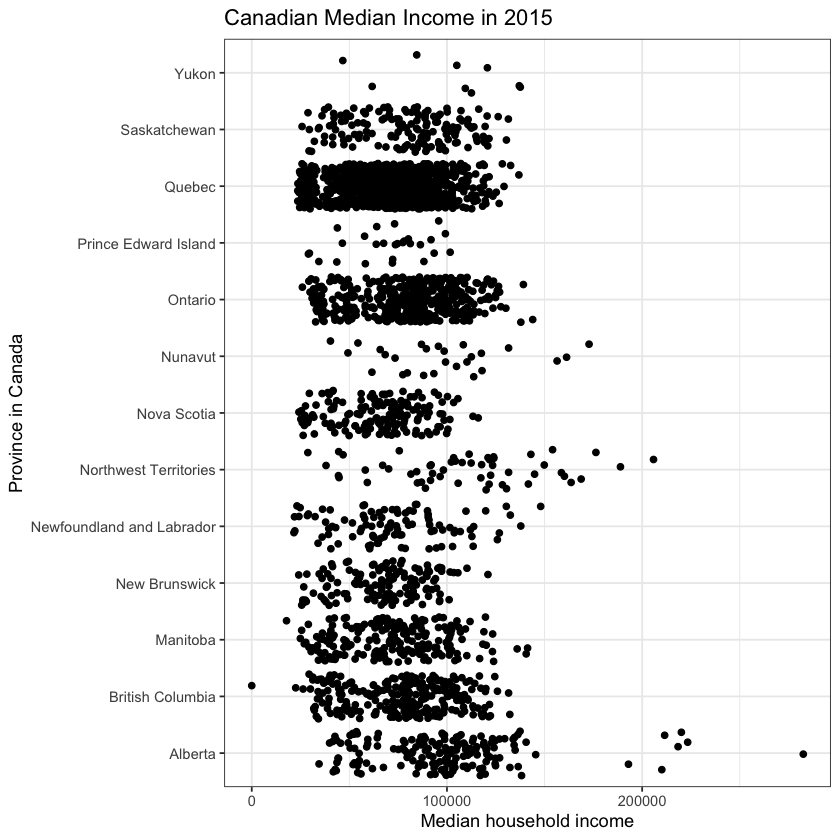

In [40]:
ggplot(census, aes(x = `Geographic name, Province or territory`, y = `Median household total income (2015 constant dollars), 2015` )) +
                  geom_jitter() +
                  ggtitle("Canadian Median Income in 2015") +
                  xlab("Province in Canada") +
                  ylab("Median household income") +
                  coord_flip()


#### Observations

- I observed that within each province, Alberta had more outlier income median. This could be because the have more employees working in extreme conditions (for example -50 weather temperatures) so they are compensated by a higher wage.
- I observed that Yukon has the lowest number of observation for income. This could be because of their low population.
- I observed that Quebec has a more densely packed median income when compared to the other province. This could mean that the wage variation for each employee regardless of your household size should be very small.
- Northwest Territory on the other hand have a more spread out distribution of median income.

### Plot a map of Canada using ggplot 

We've seen dozens of examples of [choropleth maps](https://serialmentor.com/dataviz/geospatial-data.html#choropleth-mapping), but have you ever seen one mapping Canadian data? Unlikely - they're almost always done with data from the United States. In this example, I will go through the creation of a Canadian choropleth. This question and data was adapted from a [recent tutorial](https://www.r-bloggers.com/canada-map/) on r-bloggers.

In [42]:
library(sf)

#### Prepare the map data

In [43]:
# First, install two packages: `geojsonio`, `sf`, and `grid` ; 
# We need them for spatial representation of the country.

# install R packages in console

# Use the `sf` library to read in geo json data
canada <- sf::st_read("https://raw.github.ubc.ca/ubc-mds/academic/4c52b7e5a46c15cec7d6c8338b42bd42bfa275ba/datasets/canada_cd_sim.geojson?token=AAAHDzhBucfHB1j2kkJZhR0e2171a_avks5dr6ehwA%3D%3D",
                   quiet=TRUE,stringsAsFactors = FALSE)

# Transform the data to a projection system
canada <- sf::st_transform(canada, crs = "+proj=lcc +lat_1=49 +lat_2=77 +lon_0=-91.52 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs")

# Create a new theme called theme_map to visualize the map (you can basically ignore this)

theme_map <- function(base_size=9, base_family="") {
    require(grid)
    theme_bw(base_size=base_size, base_family=base_family) %+replace%
        theme(axis.line=element_blank(),
              axis.text=element_blank(),
              axis.ticks=element_blank(),
              axis.title=element_blank(),
              panel.background=element_blank(),
              panel.border=element_blank(),
              panel.grid=element_blank(),
              panel.spacing=unit(0, "lines"),
              plot.background=element_blank(),
              legend.justification = c(0,0),
              legend.position = c(0,0)
              )
}

# Create a random colour scheme for the map
map_colors <-  RColorBrewer::brewer.pal(8, "Set3")
map_colors <- rep(map_colors, 40)

theme_set(theme_map()) # override current theme with a map theme

#### Plot Map of Canada! 

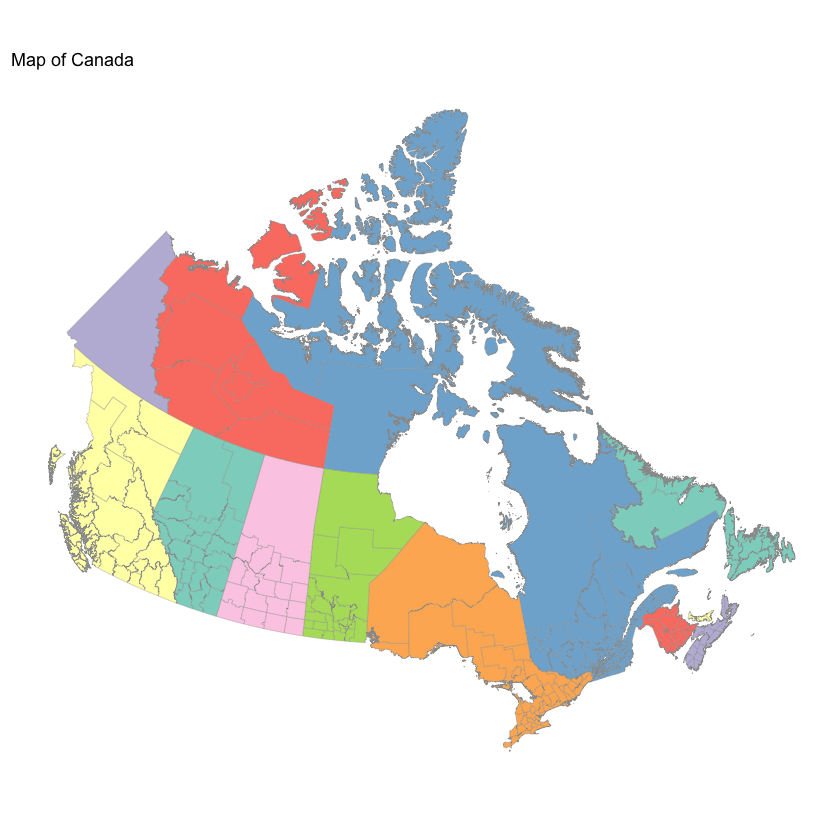

In [44]:
ggplot(data = canada,
        mapping = aes(fill = PRUID))+ 
        geom_sf(color = "gray60", 
                size = 0.1) +
        guides(fill = FALSE) + 
        theme_map() +
        scale_fill_manual(values = map_colors) + 
        theme(panel.grid.major = element_line(color = "white"),
              legend.key = element_rect(color = "red", size = 0.1)) + 
        ggtitle("Map of Canada")

#### Visualizing Canada's median household income geospatially

Encoding the median household income on the map of Canada

#### Wrangle, Munge, and Merge the `census` data with the `canada` map data

In [21]:
# Filter the census data to just select a general house hold type
# income <-filter(census,
#        census['Household type']=='Total  Household type including census family structure')

household_type <- census$`Household type`[1]
income <-filter(census,
 census['Household type']== household_type)


# Create a new column (GeoCode) that treats teh CDUID as a double rather than char
canada <- mutate(canada,'GeoCode'=as.double(canada[['CDUID']]))

# Join the datasets together; 
# use census dictionary: https://www12.statcan.gc.ca/census-recensement/2011/ref/dict/98-301-X2011001-eng.pdf
fullds<-full_join(canada,income,by = c('GeoCode'='Geographic code'))

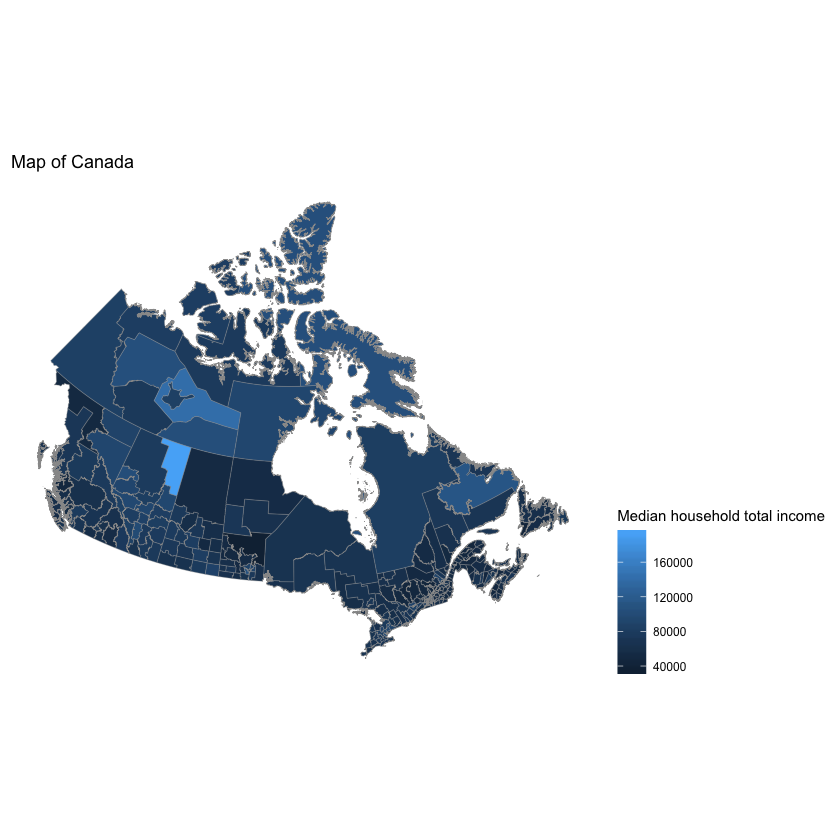

In [30]:
# Hint: if you store the column name as a vector, you can pass it into the aesthetic as follows: `fill=.data[[income_column]]`
income_column <- c('Median household total income (2015 constant dollars), 2015')

### MY SOLUTION 
ggplot(data = fullds,
        mapping = aes(fill=.data[[income_column]]))+ 
        geom_sf(color = "gray60", 
                size = 0.1) +
        guides() + 
        theme_map() +
        scale_fill_gradient(low = "#132B43", high = "#56B1F7") + 
        theme(panel.grid.major = element_line(color = "white"),
              legend.position = "right",
              legend.key = element_rect(color = "red", size = 0.1)) + 
              labs(fill= "Median household total income")+
        ggtitle("Map of Canada")

#### Observation
- I observed that the majority of households in Canada receive a total income between (40000-150000) CAD
- I observed that the median income of households towards the southern region (the bottom part of the map) is relatively low when compared to the rest of Canada. 
- I also observed the some region in Northwest territory and Nuvanut has the highest household income 
- I observed that province in the colder region have more household income.
- I also observed that most households in the Manitoba province are paid below 120000
- Saskatchewan and manitoba are the lowest paid province 